In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

def VI(env, V0=None, epsilon=1e-10):
    """
    Value Iteration for average weighted MDPs.
    
    :param env: Four_Room instance.
    :param epsilon: Threshold for a stopping criterion.
    :return: Number of iterations, optimal policy, and value function.
    """

    # Initialization of the value function to zeros.
    V = np.zeros(env.nS)
    Vprev = np.zeros(env.nS)
    gain = 0
    
    niter = 0  # Iteration counter.

    # The main loop of the VI algorithm.
    while True:
        niter += 1
        
        # Update the value function for each state.
        for s in range(env.nS):
            V[s] = np.max([env.R[s, a] + sum([Vprev[ss] * p for (ss, p) in enumerate(env.P[s, a])]) for a in range(env.nA)])
        
        V_diff = V - Vprev        

        # Check for convergence.
        if np.max(V_diff) - np.min(V_diff) < epsilon:
            break
        
        Vprev = V.copy() # Update the previous value function.
        
    gain = 0.5 * (np.max(V_diff) + np.min(V_diff))
    bias = V - np.min(V) * np.ones(env.nS)
    # Once we have the optimal value function, derive the optimal policy.
    optimal_policy = np.zeros(env.nS, dtype=int)
    for s in range(env.nS):
        action_values = [env.R[s, a] + sum([p * V[ss] for (ss, p) in enumerate(env.P[s, a])]) for a in range(env.nA)]
        optimal_policy[s] = np.argmax(action_values)

    return niter, optimal_policy, V, gain, bias

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

def plot_policy_and_value(env, pi, v_star, fig_name=None, label='Value'):
    # Initialize a 7x7 grid
    grid = np.full((7, 7), np.nan)  # Use NaN for non-assigned cells

    # Map v_star to the grid, skipping walls
    v_star_index = 0
    for i in range(7):
        for j in range(7):
            if env[i][j] != -1:
                grid[i][j] = v_star[v_star_index]
                v_star_index += 1

    # Create the plot
    fig, ax = plt.subplots(figsize=(7, 7))

    # Normalize the colormap to the range of v_star values
    norm = Normalize(vmin=min(v_star), vmax=max(v_star))

    # Display the grid as a heatmap
    cmap = plt.cm.viridis  # Heatmap colormap
    cmap.set_bad('black')  # Set color for NaN (walls) to black
    heatmap = ax.imshow(grid, cmap=cmap, norm=norm)

    # Add a color bar
    cbar = fig.colorbar(heatmap, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(label, rotation=270, labelpad=20)

    # Overlay arrows for policy
    for i, row in enumerate(env):
        for j, state in enumerate(row):
            if state == -1:
                continue
            
            if env[i][j] == 19:
                continue
            
            action = pi[state]
            dx, dy = 0, 0
            if action == 0:  # up
                dy = -0.5
            elif action == 1:  # right
                dx = 0.5
            elif action == 2:  # down
                dy = 0.5
            elif action == 3:  # left
                dx = -0.5
            ax.arrow(j - 0.5 * dx, i - 0.5 * dy, dx, dy, head_width=0.2, head_length=0.2, fc='white', ec='white')

    # Adjust plot
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_aspect('equal')
    if fig_name is not None:
        plt.savefig(fig_name, bbox_inches='tight')
    plt.show()

# VI for average weighted MDP

Bias span: 0.9243738874162091
Number of iterations: 152
Optimal gain: 0.07562562057751432
1/g*: 13.223031987883335


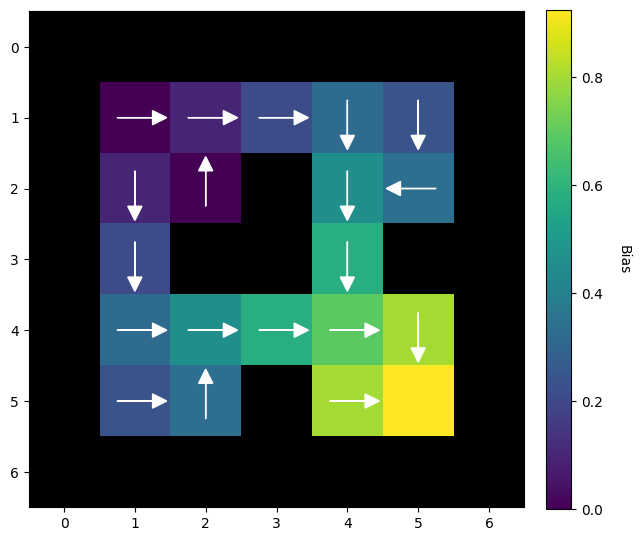

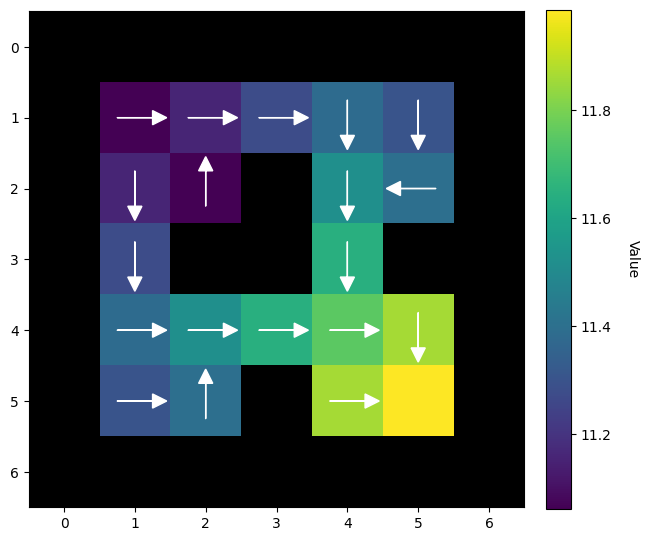

In [5]:
from HA3_gridworld import Four_Room_Teleportation


env = Four_Room_Teleportation()
niter, pi, v_star, gain, bias = VI(env, epsilon=1e-6)

bias_span = np.max(bias) - np.min(bias)

print("Bias span:", bias_span)
print("Number of iterations:", niter)
print("Optimal gain:", gain)
print("1/g*:", 1/gain)

plot_policy_and_value(env.map, pi, bias, fig_name="artifacts/4_bias.png", label="Bias")
plot_policy_and_value(env.map, pi, v_star, fig_name="artifacts/4_value.png", label="Value")
